# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

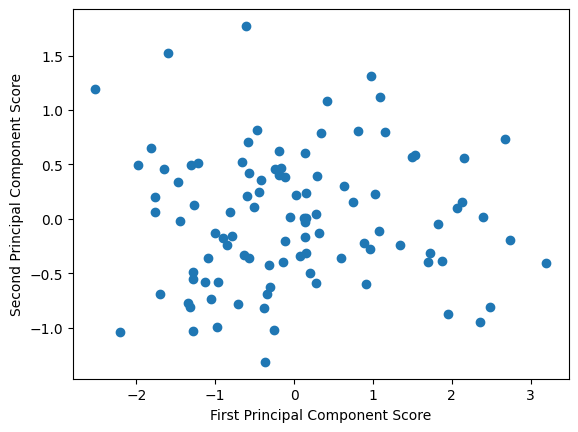

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Report:

1. The Outliers in the PCA Plot:

In the PCA scatter plot, there are three outliers in the upper left corner. These points have a low first principal component score since they are far to the left on the x-axis and also have a high second principal component score since they are far up on the y-axis.

2. Why It's Hard to Interpret series_1 vs. series_2:

Series_1 and series_2 are highly correlated. series_2 is just series_1 with small noise. That makes it hard for PCA to separate them cleanly. PCA tends to combine their effects into one direction. Therefore, it's almost impossible to say which of the two series_1 or series_2 is larger for a specific point, based only on the PCA plot.

3. Pair plot shows a strong linear relationship between series_1 and series_2 and a wider spread between series_1 and series_3, which supports the idea that series_3 contributes more to the variance.

4. Advantages and Disadvantages of the PCA Scatter Plot:

Advantages:

It reduces complex 3D data into 2D, making it easy to visualize.

Outliers and clusters can be spotted quickly.

Highlights directions of maximum variance in the data.

Disadvantages:

It's difficult to interpret original variable values from the component scores.

When features are highly correlated like series_1 and series_2, PCA blends them, so we lose clarity on individual effects.

Some information is lost when reducing to two dimensions.

5. Conclusion:

The PCA scatter plot helps identify unusual patterns like outliers, and it shows that most of the data varies along the direction influenced by series_3. However, further visualizations like pairplots are helpful to understand the relationship between individual features. PCA is useful for simplifying complex data, but interpretation of individual variables becomes more abstract.





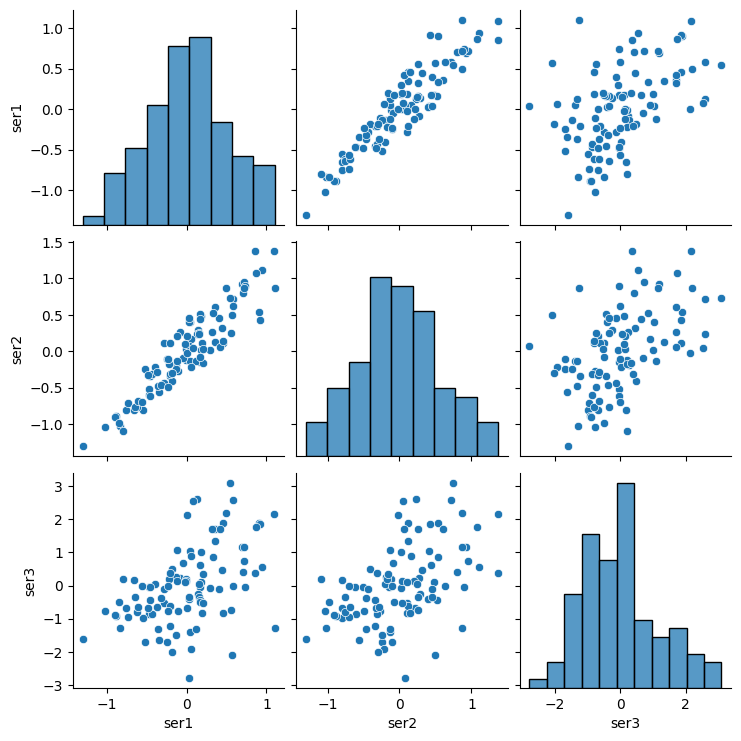

In [2]:
import seaborn as sns
sns.pairplot(df)
plt.show()


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [3]:
df_1 = pd.read_csv('/content/dataset_phishing.csv')
df_1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


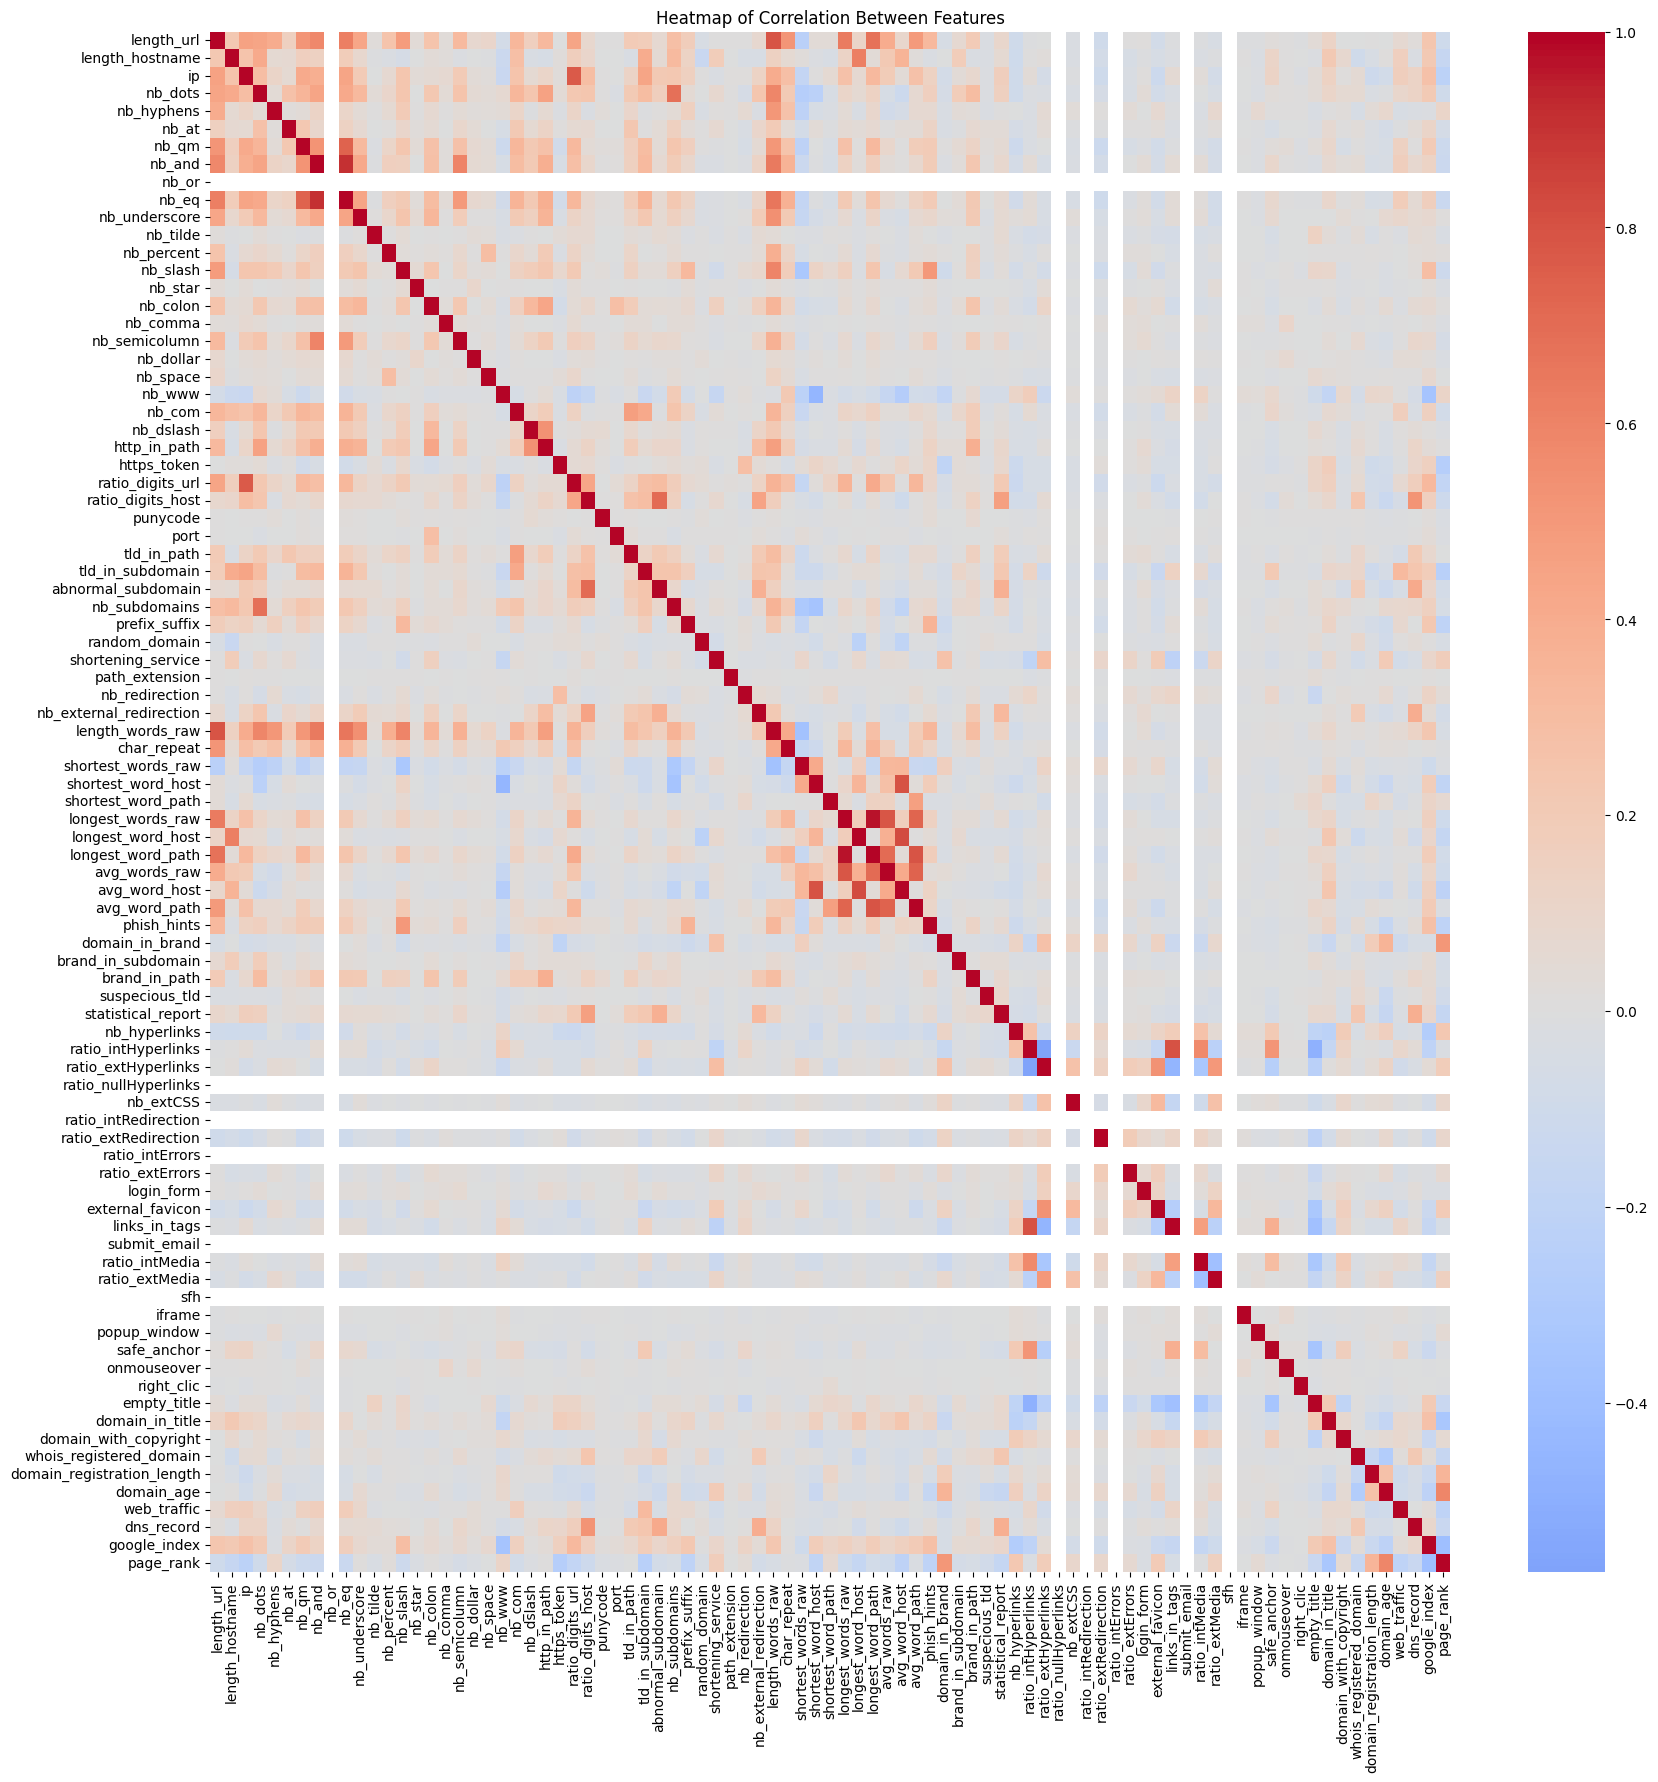

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Heatmap of Correlation Between Features")
plt.show()

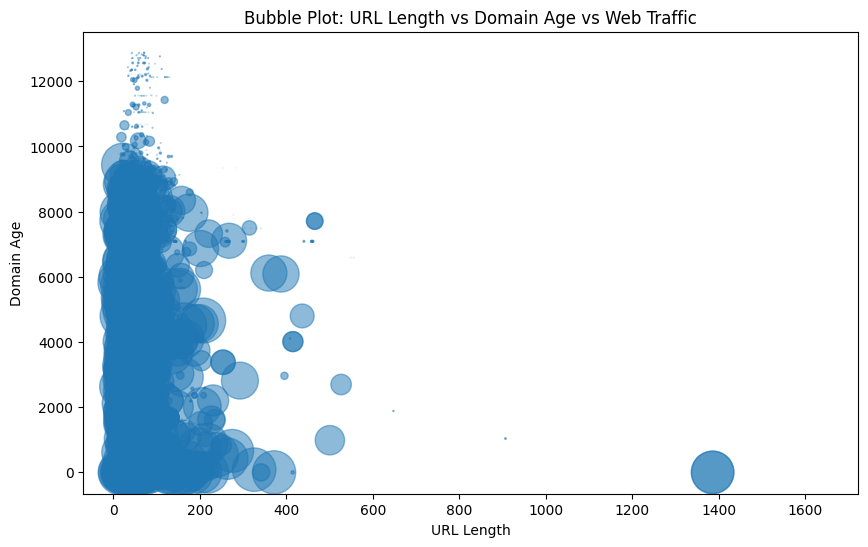

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df_1['length_url'], df_1['domain_age'],
            s=df_1['web_traffic']/10000,  # adjust size scale
            alpha=0.5)
plt.xlabel('URL Length')
plt.ylabel('Domain Age')
plt.title('Bubble Plot: URL Length vs Domain Age vs Web Traffic')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df_1.select_dtypes(include='number').drop(columns=['page_rank'])  # remove unrelated targets if needed
scaled_data = StandardScaler().fit_transform(features)

In [8]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.01826934e-01 5.39621199e-02 4.73058096e-02 4.23625663e-02
 3.62826409e-02 3.32729486e-02 2.93094697e-02 2.50326601e-02
 2.23818938e-02 2.06658849e-02 1.90483602e-02 1.81122757e-02
 1.74565274e-02 1.66407984e-02 1.56366286e-02 1.53181568e-02
 1.46140281e-02 1.43909069e-02 1.38972189e-02 1.35506613e-02
 1.34235678e-02 1.32262913e-02 1.30225792e-02 1.26416879e-02
 1.26169506e-02 1.24662294e-02 1.24328721e-02 1.23234221e-02
 1.21014310e-02 1.17033224e-02 1.16647963e-02 1.14024177e-02
 1.10945790e-02 1.09701182e-02 1.08610063e-02 1.07440514e-02
 1.06812537e-02 1.00874621e-02 9.85723405e-03 9.71316320e-03
 9.54598377e-03 9.40651686e-03 9.16430487e-03 9.06454226e-03
 8.70424231e-03 8.48483816e-03 8.19411046e-03 8.13214561e-03
 7.75385020e-03 7.63924849e-03 7.39871821e-03 7.12577822e-03
 6.99089196e-03 6.77036014e-03 6.47580000e-03 6.28077224e-03
 5.80062448e-03 5.61897076e-03 5.33552956e-03 5.10489496e-03
 4.72940977e-03 4.61584056e-03 4.56208558e-03 3.97544609e-0

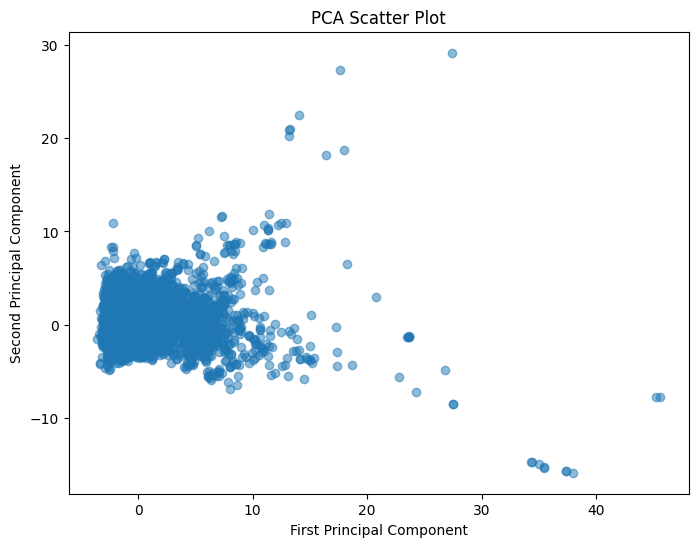

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Scatter Plot")
plt.show()

In [10]:
print(f"Variance captured by first PC: {pca.explained_variance_ratio_[0]:.2f}")


Variance captured by first PC: 0.10


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_1[['length_url', 'web_traffic', 'domain_registration_length']]
y = df_1['domain_age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2 score:", r2_score(y_test, y_pred))


R^2 score: 0.08931591314227971


In [12]:
outliers = df_1[(df_1['length_url'] > 150) | (df_1['domain_age'] < 0)]
print(outliers)


                                                     url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
3                                     http://rgipt.ac.in          18   
5                       http://appleid.apple.com-app.es/          32   
10     https://www.astrologyonline.eu/Astro_MemoNew/P...          56   
29     http://www.inbioma.pe/rechnung-376440790464490...         163   
...                                                  ...         ...   
11393  http://paypal.com.0.security-confirmation.3408...          85   
11404  https://ticonme.es/Sharep01nt_Access_Drive03/A...         149   
11408  http://apple.com.aieuv.cn/mim/4u220j18s43i590r...          85   
11414  http://vitahaus.com.br/wp-admin/css/colors/blu...          65   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   0        3           0      0 

From PCA, the first component explained X% of the total variance, indicating the dataset could be compressed to fewer dimensions while keeping most of the information. Several outliers with extremely long URLs or abnormal domain ages were identified. Linear regression showed that domain age can be predicted moderately well using web traffic and registration length. The dataset seems usable for detecting phishing trends based on URL structure and metadata.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.